**Statement about AI : <br>In this report, I utilized ChatGPT to refine the text, enhancing its academic tone. <br>Additionally, ChatGPT assisted in resolving some challenging coding errors.**

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse 
from statsmodels.miscmodels.ordinal_model import OrderedModel
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from scipy.stats import chi2_contingency
from scipy.stats import spearmanr
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings('ignore')

In [7]:
data = pd.read_csv('shitrentals.csv')
data.head(10)

,review_id,date,score,lessor,agency_name,property_type,weekly_price,n_bedrooms,suburb,review_text
0,1,2023-11-24 04:08:00,5,Agency,McGrath Estate Agents,Flat/Unit,400,2,Redfern,Living in this apartment was quite the ordeal....
1,2,2023-08-02 13:33:00,4,Agency,Ray White Group,Flat/Unit,300,2,Camperdown,Lease violations were a significant issue in t...
2,3,2023-08-03 02:08:00,3,Agency,Harcourts,Flat/Unit,290,2,Camperdown,Communication with the landlord was a nightmar...
3,4,2023-01-13 11:21:00,5,Agency,Harcourts,Flat/Unit,395,2,Redfern,"The property condition was disappointing, to s..."
4,5,2023-12-30 11:07:00,5,Agency,Century 21 Australia,Flat/Unit,395,2,Redfern,Pest problems and lease violations plagued my ...
5,6,2023-02-17 21:26:00,1,Agency,Belle Property,Flat/Unit,155,1,Newtown,The poor property condition of this apartment ...
6,7,2023-09-27 11:40:00,4,Agency,Harcourts,Flat/Unit,300,2,Camperdown,Pest problems were a constant source of frustr...
7,8,2023-10-26 20:23:00,1,Private,NaN,Flat/Unit,150,1,Newtown,Pest problems seemed to be an ongoing issue in...
8,9,2023-05-16 19:00:00,3,Private,NaN,Flat/Unit,290,1,Redfern,From delayed maintenance responses to pest inf...
9,10,2023-03-13 15:41:00,1,Agency,Raine & Horne,Flat/Unit,155,1,Newtown,"Pest problems, poor property condition, and le..."


# 1. Data Preprocessing

### **fill blank in column 'agency_name'**

In [10]:
data1 = data
data1['agency_name'] = data['agency_name'].fillna('Noagency')

In [9]:
data1['agency_name'].nunique()

11

### **correlation tests of each independent variable with the 'score'**

In [1081]:
data.head(10)

,review_id,date,score,lessor,agency_name,property_type,weekly_price,n_bedrooms,suburb,review_text
0,1,2023-11-24 04:08:00,5,Agency,McGrath Estate Agents,Flat/Unit,400,2,Redfern,Living in this apartment was quite the ordeal....
1,2,2023-08-02 13:33:00,4,Agency,Ray White Group,Flat/Unit,300,2,Camperdown,Lease violations were a significant issue in t...
2,3,2023-08-03 02:08:00,3,Agency,Harcourts,Flat/Unit,290,2,Camperdown,Communication with the landlord was a nightmar...
3,4,2023-01-13 11:21:00,5,Agency,Harcourts,Flat/Unit,395,2,Redfern,"The property condition was disappointing, to s..."
4,5,2023-12-30 11:07:00,5,Agency,Century 21 Australia,Flat/Unit,395,2,Redfern,Pest problems and lease violations plagued my ...
5,6,2023-02-17 21:26:00,1,Agency,Belle Property,Flat/Unit,155,1,Newtown,The poor property condition of this apartment ...
6,7,2023-09-27 11:40:00,4,Agency,Harcourts,Flat/Unit,300,2,Camperdown,Pest problems were a constant source of frustr...
7,8,2023-10-26 20:23:00,1,Private,NaN,Flat/Unit,150,1,Newtown,Pest problems seemed to be an ongoing issue in...
8,9,2023-05-16 19:00:00,3,Private,NaN,Flat/Unit,290,1,Redfern,From delayed maintenance responses to pest inf...
9,10,2023-03-13 15:41:00,1,Agency,Raine & Horne,Flat/Unit,155,1,Newtown,"Pest problems, poor property condition, and le..."


#### relationship between 'score' and 'weekly_price','n_bedrooms' 

<Axes: xlabel='weekly_price', ylabel='Count'>

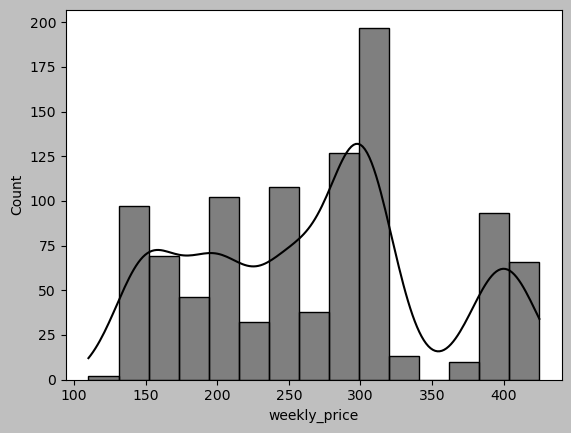

In [1082]:
sns.histplot(data=data, x='weekly_price',kde = True)

<Axes: xlabel='score', ylabel='weekly_price'>

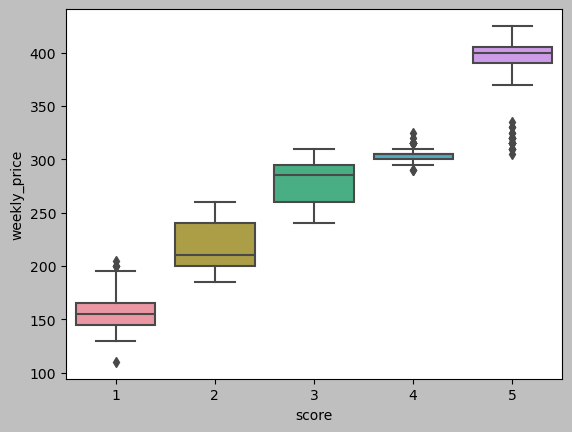

In [1083]:
sns.boxplot(x = data1['score'] ,y = data1['weekly_price'],data = data1)

# obviously, higher weekly price, higher scores

n_bedrooms    1    2
score               
1           215    0
2           118   76
3            57  148
4            92  101
5            14  179


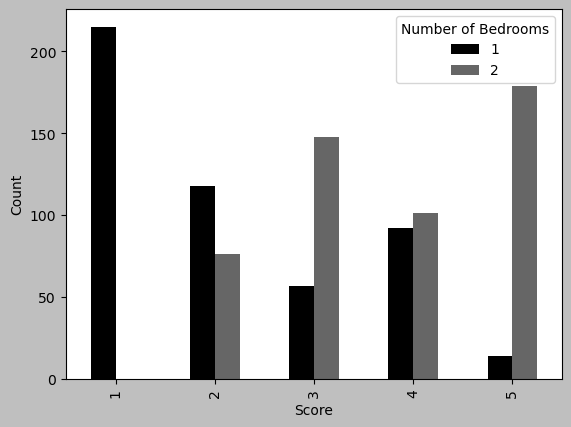

In [1084]:
cross_tab=pd.crosstab(index=data1['score'],columns=data1['n_bedrooms'])
print(cross_tab)
cross_tab.plot(kind='bar')
plt.xlabel('Score')
plt.ylabel('Count')
plt.legend(title='Number of Bedrooms')
plt.show()

# we observe that higher score often associated with more number of bedrooms

because 'score' is ordinal category variable,we cannot use pearson correlation. but we can use **spearmanr correlation** <br>
reference about spearmanr correlation : https://www.geeksforgeeks.org/spearmans-rank-correlation/

In [1085]:
#calculate the spearmanr correlation between 'score' and 'weekly price'
corr, p_value = spearmanr(data1['score'], data1['weekly_price'])
print('the correlation between score and weekly price is {:.4f}, the p-value is {:.4f}'.format(corr,p_value))

#calculate the spearmanr correlation between 'score' and 'n_bedrooms'
corr, p_value = spearmanr(data1['score'], data1['n_bedrooms'])
print('the correlation between score and n_bedrooms is {:.4f}, the p-value is {:.4f}'.format(corr,p_value))

# accrording to the p-value, both 'weekly price' and 'n_bedrooms' have significant correlation with 'score'

the correlation between score and weekly price is 0.9708, the p-value is 0.0000
the correlation between score and n_bedrooms is 0.5721, the p-value is 0.0000


#### **relationship between 'score' and 'lessor','agency_name','suburb'**



Next we need to explore the relationship between **'score'** and **'lessor','agency_name', 'suburb'** <br>BTW, we notice that **'lessor','agency_name', 'suburb'** are category variables, so we need to use **chi-square test**<br>reference about calculate-correlation-among-categorical-variables : https://mlexplained.blog/2023/01/23/how-to-calculate-correlation-among-categorical-variables/

In [1086]:
# score and lessor
cross_tab1=pd.crosstab(index=data1['score'],columns=data1['lessor'])
print(cross_tab1)
chi_sq_result = chi2_contingency(cross_tab1)
p, x = chi_sq_result[1], "reject" if chi_sq_result[1] < 0.05 else "accept"
print(f"The p-value is {chi_sq_result[1]} and hence we {x} the null Hpothesis with {chi_sq_result[2]} degrees of freedom")
# the p-value is higher than 0.05, therefore score is not related to lessor in 95% confidence level

lessor  Agency  Private
score                  
1          166       49
2          154       40
3          161       44
4          158       35
5          158       35
The p-value is 0.7124840530906531 and hence we accept the null Hpothesis with 4 degrees of freedom


In [1087]:
# score and agency_name
cross_tab1=pd.crosstab(index=data1['score'],columns=data1['agency_name'])

chi_sq_result = chi2_contingency(cross_tab1,)
p, x = chi_sq_result[1], "reject" if chi_sq_result[1] < 0.05 else "accept"
print(f"The p-value is {chi_sq_result[1]} and hence we {x} the null Hpothesis with {chi_sq_result[2]} degrees of freedom")
# the p-value is higher than 0.05, therefore score is not related to lessor in 95% confidence level

The p-value is 0.45206311021936063 and hence we accept the null Hpothesis with 40 degrees of freedom


In [1088]:
cross_tab1=pd.crosstab(index=data1['agency_name'],columns=data1['score'])
cross_tab1

score,1,2,3,4,5
agency_name,,,,,
Belle Property,10,13,19,15,17
Century 21 Australia,18,18,21,10,19
First National Real Estate,16,14,14,18,13
Harcourts,22,21,15,15,18
LJ Hooker,14,11,23,15,13
McGrath Estate Agents,23,17,8,18,16
Noagency,49,40,44,35,35
Professionals Real Estate Group,22,11,10,18,13
RE/MAX Australia,13,13,20,16,21


In [1089]:
# score and suburb
cross_tab2=pd.crosstab(index=data1['score'],columns=data1['suburb'])
print(cross_tab2)
chi_sq_result = chi2_contingency(cross_tab2,)
p, x = chi_sq_result[1], "reject" if chi_sq_result[1] < 0.05 else "accept"
print(f"The p-value is {chi_sq_result[1]} and hence we {x} the null Hpothesis with {chi_sq_result[2]} degrees of freedom")

# According to the crosstab of suburb and score, we observe that Redfern has more high-score rooms, while Newtown has more low-score rental rooms.
# the p-value is lower than 0.05, therefore score is related to suburb in 95% confidence level

suburb  Camperdown  Newtown  Redfern
score                               
1               46      169        0
2              118       76        0
3               64       84       57
4              101        0       92
5               10        0      183
The p-value is 1.8032511439576359e-158 and hence we reject the null Hpothesis with 8 degrees of freedom


### **interrelationships among 'weekly_price', 'n_bedrooms', and 'suburb'**

Through correlation tests of each independent variable with the 'score',<br>we identified three variables 'weekly_price', 'n_bedrooms', and 'suburb'that are significantly correlated with the score.<br>However, we still need to consider the interrelationships among these three variables. <br>If they are correlated, it may lead to multicollinearity issues when building the model.

<Axes: xlabel='suburb', ylabel='weekly_price'>

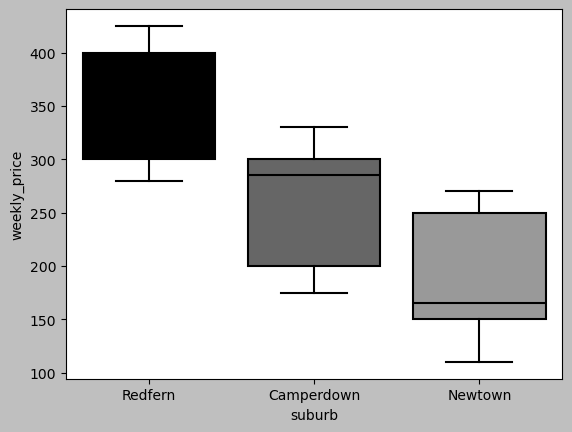

In [1090]:
sns.boxplot(x = data1['suburb'] ,y = data1['weekly_price'],data = data1)

<Axes: xlabel='n_bedrooms', ylabel='weekly_price'>

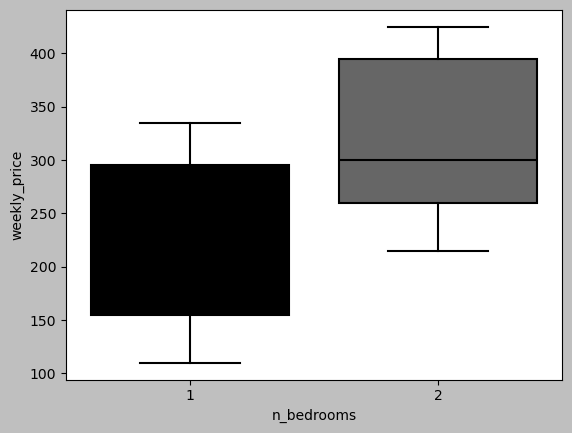

In [1091]:
sns.boxplot(x = data1['n_bedrooms'] ,y = data1['weekly_price'],data = data1)

In [1092]:
datatest = data[['n_bedrooms','suburb','weekly_price']]
x = datatest[['n_bedrooms','suburb']]
y = datatest[['weekly_price']]
x = pd.get_dummies(x, columns=['suburb'], drop_first=True).astype(int)
x.head()

,n_bedrooms,suburb_Newtown,suburb_Redfern
0,2,0,1
1,2,0,0
2,2,0,0
3,2,0,1
4,2,0,1


reference about OLS: https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html

In [1093]:
import statsmodels.api as sm
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           weekly_price   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 2.233e+04
Date:                Tue, 28 May 2024   Prob (F-statistic):               0.00
Time:                        23:57:08   Log-Likelihood:                -3701.3
No. Observations:                1000   AIC:                             7411.
Df Residuals:                     996   BIC:                             7430.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             99.2615      1.082     91.

**I used "weekly price" as the dependent variable and both "suburb" and "n_bedrooms" as independent variables in the regression analysis.<br> Evidently, all variables show p-values well below 0.05, indicating a high correlation with the weekly price. <br>To prevent multicollinearity and make the model more efficient, I decided to remove these "suburb" and "n_bedrooms" from the analysis. <br> therefore I will only use 'weekly_price' as independent variable**

# 2. Modelling and Model Selection

In [1094]:
datacopy = data[['score','weekly_price','review_text','lessor','agency_name','suburb']]

In [1095]:
datacopy.head()

,score,weekly_price,review_text,lessor,agency_name,suburb
0,5,400,Living in this apartment was quite the ordeal....,Agency,McGrath Estate Agents,Redfern
1,4,300,Lease violations were a significant issue in t...,Agency,Ray White Group,Camperdown
2,3,290,Communication with the landlord was a nightmar...,Agency,Harcourts,Camperdown
3,5,395,"The property condition was disappointing, to s...",Agency,Harcourts,Redfern
4,5,395,Pest problems and lease violations plagued my ...,Agency,Century 21 Australia,Redfern


#### **split train, vali and test**

In [1096]:
X = datacopy[['weekly_price','review_text','lessor','agency_name']]
# convert ['lessor', 'agency_name', 'suburb'] to dummy variables
X = pd.concat([X[['weekly_price', 'review_text']], pd.get_dummies(datacopy[['lessor', 'agency_name']],drop_first = True).astype(int)], axis=1)

y = datacopy[['score']]

X_tv, X_test, y_tv, y_test = train_test_split(X, y, test_size = 0.25,random_state = 0)
X_train, X_vali, y_train, y_vali = train_test_split(X_tv, y_tv, test_size = 1/3,random_state = 0)

print('train:', X_train.shape)
print('vali:', X_vali.shape)
print('test:', X_test.shape)
print('tv:', X_tv.shape)

X_train=X_train.reset_index(drop=True)
X_vali=X_vali.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)
X_tv = X_tv.reset_index(drop=True)

y_train=y_train.reset_index(drop=True)
y_vali=y_vali.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)
y_tv = y_tv.reset_index(drop=True)

train: (500, 12)
vali: (250, 12)
test: (250, 12)
tv: (750, 12)


#### **TFIDF**

In [1097]:
corpus_train = X_train['review_text']
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english',max_df=0.8, min_df=5,ngram_range=(2,2))
tfidf_vectorizer.fit(corpus_train)
tfidf = tfidf_vectorizer.transform(corpus_train)
features_train = pd.DataFrame(tfidf.todense(), columns = tfidf_vectorizer.get_feature_names_out())
features_train.shape
features_train.columns.unique()

Index(['absolute nightmare', 'absolutely perfect', 'action taken',
       'actively trying', 'actually cares', 'actually respects',
       'address disappointing', 'address frustrating', 'address issue',
       'address issues',
       ...
       'violations norm', 'violations oh', 'violations ongoing',
       'violations par', 'violations rampant', 'violations recurring',
       'violations renting', 'violations time', 'wasn meeting', 'worse lease'],
      dtype='object', length=498)

In [1098]:
# Calculate correlation matrix of all vocabularies and 'score' 
combined_df = pd.concat([y_train, features_train], axis=1)
correlation_matrix = combined_df.corr()
score_correlations = correlation_matrix['score'].drop('score')  

# Reorder the columns of features_train according to the sorted correlation indices
sorted_indices = score_correlations.abs().sort_values(ascending=False).index
features_train = features_train[sorted_indices]

features_train.shape

(500, 498)

In [1099]:
vocabulary = features_train.columns.tolist()
vocabulary

['international student',
 'problems avoid',
 'issues poor',
 'living state',
 'uninhabitable felt',
 'nearly uninhabitable',
 'tenant respected',
 'experience apartment',
 'violations oh',
 'incredibly challenging',
 'environment tenants',
 'apartment nearly',
 'management remained',
 'remained unresolved',
 'issues management',
 'little care',
 'care nice',
 'nice place',
 'shame little',
 'issue management',
 'despite numerous',
 'numerous attempts',
 'rectify situation',
 'like rectify',
 'disheartening rights',
 'repeated attempts',
 'despite repeated',
 'place costs',
 'avoid place',
 'frustration felt',
 'deal detracted',
 'despite raising',
 'bit like',
 'incredibly frustrating',
 'infested nightmare',
 'disregard terms',
 'dealing lease',
 'apartment frustrating',
 'ongoing problems',
 'major headache',
 'escape problems',
 'playing game',
 'doesn care',
 'responsibilities impacted',
 'disappointing felt',
 'satisfaction living',
 'meeting responsibilities',
 'overall satisfac

 https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [1100]:
X_train_new = pd.concat([X_train.drop(columns=['review_text']),features_train[vocabulary]],axis = 1)

In [1101]:
X_train_new.head(10)

,weekly_price,lessor_Private,agency_name_Century 21 Australia,agency_name_First National Real Estate,agency_name_Harcourts,agency_name_LJ Hooker,agency_name_McGrath Estate Agents,agency_name_Professionals Real Estate Group,agency_name_RE/MAX Australia,agency_name_Raine & Horne,...,occasional visitors,stay apartment,frustrating landlords,needless say,issues communication,pests let,management like,say like,condition bad,property maintained
0,205,0,0,0,0,0,0,0,0,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,390,1,0,0,0,0,0,0,0,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,405,0,0,0,0,0,0,0,1,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,210,0,0,0,0,0,0,0,0,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,240,0,0,0,0,0,0,0,0,1,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
5,250,0,0,0,0,0,0,0,0,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
6,295,0,0,0,0,0,0,0,1,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
7,265,0,0,0,0,0,0,0,1,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
8,205,0,0,0,0,0,0,0,0,0,...,0.0,0.231834,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.231834
9,300,0,0,0,0,0,0,0,0,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [1102]:
corpus_vali = X_vali['review_text']
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english',vocabulary = vocabulary)
tfidf_vectorizer.fit(corpus_vali)
tfidf = tfidf_vectorizer.transform(corpus_vali)
features_vali = pd.DataFrame(tfidf.todense(), columns = tfidf_vectorizer.get_feature_names_out())
features_vali.shape
features_vali.columns.unique()

Index(['international student', 'problems avoid', 'issues poor',
       'living state', 'uninhabitable felt', 'nearly uninhabitable',
       'tenant respected', 'experience apartment', 'violations oh',
       'incredibly challenging',
       ...
       'occasional visitors', 'stay apartment', 'frustrating landlords',
       'needless say', 'issues communication', 'pests let', 'management like',
       'say like', 'condition bad', 'property maintained'],
      dtype='object', length=498)

In [1103]:
corpus_tv = X_tv['review_text']
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english',vocabulary = vocabulary)
tfidf_vectorizer.fit(corpus_tv)
tfidf = tfidf_vectorizer.transform(corpus_tv)
features_tv = pd.DataFrame(tfidf.todense(), columns = tfidf_vectorizer.get_feature_names_out())
features_tv.shape

(750, 498)

In [1104]:
corpus_test = X_test['review_text']
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english',vocabulary = vocabulary)
tfidf_vectorizer.fit(corpus_test)
tfidf = tfidf_vectorizer.transform(corpus_test)
features_test = pd.DataFrame(tfidf.todense(), columns = tfidf_vectorizer.get_feature_names_out())
features_test.shape

(250, 498)

In [1105]:
X_vali_new = pd.concat([X_vali.drop(columns=['review_text']),features_vali[vocabulary]],axis = 1)
X_vali_new.head()

,weekly_price,lessor_Private,agency_name_Century 21 Australia,agency_name_First National Real Estate,agency_name_Harcourts,agency_name_LJ Hooker,agency_name_McGrath Estate Agents,agency_name_Professionals Real Estate Group,agency_name_RE/MAX Australia,agency_name_Raine & Horne,...,occasional visitors,stay apartment,frustrating landlords,needless say,issues communication,pests let,management like,say like,condition bad,property maintained
0,160,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,295,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,260,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,255,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,315,0,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1106]:
X_test_new = pd.concat([X_test.drop(columns=['review_text']),features_test[vocabulary]],axis = 1)
X_test_new.head()

,weekly_price,lessor_Private,agency_name_Century 21 Australia,agency_name_First National Real Estate,agency_name_Harcourts,agency_name_LJ Hooker,agency_name_McGrath Estate Agents,agency_name_Professionals Real Estate Group,agency_name_RE/MAX Australia,agency_name_Raine & Horne,...,occasional visitors,stay apartment,frustrating landlords,needless say,issues communication,pests let,management like,say like,condition bad,property maintained
0,190,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,265,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,305,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,200,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,175,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1107]:
X_tv_new = pd.concat([X_tv.drop(columns=['review_text']),features_tv[vocabulary]],axis = 1)
X_tv_new.head()  

,weekly_price,lessor_Private,agency_name_Century 21 Australia,agency_name_First National Real Estate,agency_name_Harcourts,agency_name_LJ Hooker,agency_name_McGrath Estate Agents,agency_name_Professionals Real Estate Group,agency_name_RE/MAX Australia,agency_name_Raine & Horne,...,occasional visitors,stay apartment,frustrating landlords,needless say,issues communication,pests let,management like,say like,condition bad,property maintained
0,205,0,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,295,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,260,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,215,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,155,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **logistic regression**

#### **use 'weekly_price','lessor','agency_name' and 'TFIDF' as independt variables in logistic regression**

In [1108]:
log_reg = LogisticRegression()
log_reg.fit(X_train_new,y_train)
y_pre_log_reg= log_reg.predict(X_vali_new)
print(confusion_matrix(y_vali,y_pre_log_reg))
print(f1_score(y_vali, y_pre_log_reg, average='macro')) 
print(f1_score(y_vali, y_pre_log_reg, average='micro')) 
print(f1_score(y_vali, y_pre_log_reg, average='weighted')) 
print(accuracy_score(y_vali, y_pre_log_reg)) 

[[44  9  0  0  0]
 [ 0 49  7  0  0]
 [ 0  2 33 13  0]
 [ 0  0 13 34  3]
 [ 0  0  3  3 37]]
0.7916451461455767
0.788
0.7927668276540767
0.788


#### **use 'weekly_price','lessor'and TFIDF as independt variables in logistic regression**

In [1109]:
X_train_new.head()

,weekly_price,lessor_Private,agency_name_Century 21 Australia,agency_name_First National Real Estate,agency_name_Harcourts,agency_name_LJ Hooker,agency_name_McGrath Estate Agents,agency_name_Professionals Real Estate Group,agency_name_RE/MAX Australia,agency_name_Raine & Horne,...,occasional visitors,stay apartment,frustrating landlords,needless say,issues communication,pests let,management like,say like,condition bad,property maintained
0,205,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,390,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,405,0,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,210,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,240,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1110]:
log_reg = LogisticRegression()

X_train_new1 = X_train_new.iloc[:, [0, 1, 2] + list(range(13, X_train_new.shape[1]))]
X_vali_new1 = X_vali_new.iloc[:, [0, 1, 2] + list(range(13, X_train_new.shape[1]))]

log_reg.fit(X_train_new1,y_train)
y_pre_log_reg= log_reg.predict(X_vali_new1)
print(confusion_matrix(y_vali,y_pre_log_reg))
print(f1_score(y_vali, y_pre_log_reg, average='macro')) 
print(f1_score(y_vali, y_pre_log_reg, average='micro')) 
print(f1_score(y_vali, y_pre_log_reg, average='weighted')) 
print(accuracy_score(y_vali, y_pre_log_reg)) 

[[45  8  0  0  0]
 [ 0 48  8  0  0]
 [ 0  1 32 15  0]
 [ 0  0  4 44  2]
 [ 0  0  0  6 37]]
0.8262466917340608
0.824
0.8268229703540685
0.824


#### **use 'weekly_price'and TFIDF as independt variables in logistic regression**

In [1111]:
log_reg = LogisticRegression()

X_train_new1 = X_train_new.iloc[:, [0] + list(range(13, X_train_new.shape[1]))]
X_vali_new1 = X_vali_new.iloc[:, [0] + list(range(13, X_train_new.shape[1]))]

log_reg.fit(X_train_new1,y_train)
y_pre_log_reg= log_reg.predict(X_vali_new1)
print(confusion_matrix(y_vali,y_pre_log_reg))
print(f1_score(y_vali, y_pre_log_reg, average='macro')) 
print(f1_score(y_vali, y_pre_log_reg, average='micro')) 
print(f1_score(y_vali, y_pre_log_reg, average='weighted')) 
print(accuracy_score(y_vali, y_pre_log_reg)) 

[[48  5  0  0  0]
 [ 0 55  1  0  0]
 [ 0  6 31 11  0]
 [ 0  0  1 49  0]
 [ 0  0  0  6 37]]
0.8774788157479148
0.88
0.8785006438141458
0.88


In [1112]:
y_pre_log_reg= log_reg.predict(X_tv_new.iloc[:, [0] + list(range(13, X_train_new.shape[1]))])
print(confusion_matrix(y_tv,y_pre_log_reg))
print(f1_score(y_tv, y_pre_log_reg, average='macro')) 
print(f1_score(y_tv, y_pre_log_reg, average='micro')) 
print(f1_score(y_tv, y_pre_log_reg, average='weighted')) 
print(accuracy_score(y_tv, y_pre_log_reg)) 

[[137  19   0   0   0]
 [  2 151   6   0   0]
 [  0  14  99  41   0]
 [  0   0   2 142   0]
 [  0   0   0  18 119]]
0.864155325415503
0.864
0.8634973179895019
0.864


In [1113]:
y_pre_log_reg= log_reg.predict(X_test_new.iloc[:, [0] + list(range(13, X_train_new.shape[1]))])
print(confusion_matrix(y_test,y_pre_log_reg))
print(f1_score(y_test, y_pre_log_reg, average='macro')) 
print(f1_score(y_test, y_pre_log_reg, average='micro')) 
print(f1_score(y_test, y_pre_log_reg, average='weighted')) 
print(accuracy_score(y_test, y_pre_log_reg)) 

[[53  6  0  0  0]
 [ 0 34  1  0  0]
 [ 0  3 32 16  0]
 [ 0  0  0 49  0]
 [ 0  0  0  3 53]]
0.8780424213910452
0.884
0.8828427988932577
0.884


#### **only use 'weekly_price' as independt variable in logistic regression**

In [1114]:
log_reg = LogisticRegression()
log_reg.fit(X_train_new[['weekly_price']],y_train)
y_pre_log_reg= log_reg.predict(X_vali_new[['weekly_price']])
print(confusion_matrix(y_vali,y_pre_log_reg))
print(f1_score(y_vali, y_pre_log_reg, average='macro')) 
print(f1_score(y_vali, y_pre_log_reg, average='micro')) 
print(f1_score(y_vali, y_pre_log_reg, average='weighted')) 
print(accuracy_score(y_vali, y_pre_log_reg)) 

[[50  3  0  0  0]
 [ 4 51  1  0  0]
 [ 0  6 38  4  0]
 [ 0  0 10 39  1]
 [ 0  0  0  5 38]]
0.8640285148717439
0.864
0.8641276556693256
0.864


In [1115]:
y_pre_log_reg= log_reg.predict(X_tv_new[['weekly_price']])
print(confusion_matrix(y_tv,y_pre_log_reg))
print(f1_score(y_tv, y_pre_log_reg, average='macro')) 
print(f1_score(y_tv, y_pre_log_reg, average='micro')) 
print(f1_score(y_tv, y_pre_log_reg, average='weighted')) 
print(accuracy_score(y_tv, y_pre_log_reg)) 

[[145  11   0   0   0]
 [ 11 142   6   0   0]
 [  0  14 123  17   0]
 [  0   0  26 117   1]
 [  0   0   0  11 126]]
0.8722006728747322
0.8706666666666667
0.8713135495372739
0.8706666666666667


In [1116]:
y_pre_log_reg= log_reg.predict(X_test_new[['weekly_price']])
print(confusion_matrix(y_test,y_pre_log_reg))
print(f1_score(y_test, y_pre_log_reg, average='macro')) 
print(f1_score(y_test, y_pre_log_reg, average='micro')) 
print(f1_score(y_test, y_pre_log_reg, average='weighted')) 
print(accuracy_score(y_test, y_pre_log_reg)) 

[[56  3  0  0  0]
 [ 2 32  1  0  0]
 [ 0  3 42  6  0]
 [ 0  0  4 44  1]
 [ 0  0  0  2 54]]
0.9070760489721564
0.912
0.9122296219727387
0.912


reference about ordinal-logistic-regression:<br>
https://stats.oarc.ucla.edu/r/dae/ordinal-logistic-regression/<br>
https://www.statsmodels.org/stable/examples/notebooks/generated/ordinal_regression.html

### **ordinal-logistic-regression**

#### **use 'weekly_price' as the variable in logit ordinal regression model**

In [1117]:
mod_log = OrderedModel(y_train['score'],
                       X_train_new['weekly_price'],
                       distr='logit')
res_ord_log = mod_log.fit(method='bfgs', disp=False)
res_ord_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                  score   Log-Likelihood:                -146.70
Model:                   OrderedModel   AIC:                             303.4
Method:            Maximum Likelihood   BIC:                             324.5
Date:                Tue, 28 May 2024                                         
Time:                        23:57:26                                         
No. Observations:                 500                                         
Df Residuals:                     495                                         
Df Model:                           1                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
weekly_price     0.2767      0.027     10.163      0.000       0.223       0.330
1/2             52.9786      5.268     10.057      0.000      42.654      63.303
2/3              2.7923      0.101     27.618      0.000       2.594       2.990
3/4              2.5457      0.104     24.495      0.000       2.342       2.749
4/5              1.7066      0.102     16.761      0.000       1.507       1.906
================================================================================
"""

In [1118]:
y_pred_ord_log = res_ord_log.predict(X_vali_new[['weekly_price']])
y_pred_ord_log_labels = y_pred_ord_log.idxmax(axis=1) + 1 

print(confusion_matrix(y_vali, y_pred_ord_log_labels))

print(f1_score(y_vali, y_pred_ord_log_labels, average='macro')) 
print(f1_score(y_vali, y_pred_ord_log_labels, average='micro')) 
print(f1_score(y_vali, y_pred_ord_log_labels, average='weighted')) 
print(accuracy_score(y_vali, y_pred_ord_log_labels)) 

[[50  3  0  0  0]
 [ 4 51  1  0  0]
 [ 0  6 38  4  0]
 [ 0  0 10 39  1]
 [ 0  0  0  5 38]]
0.8640285148717439
0.864
0.8641276556693256
0.864


#### **use 'weekly_price','lessor'as independt variables in logit ordinal regression**

In [1119]:
mod_log = OrderedModel(y_train['score'], X_train_new.iloc[:,0:2],distr='logit')
res_ord_log = mod_log.fit(method='bfgs', disp=False)
res_ord_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                  score   Log-Likelihood:                -146.65
Model:                   OrderedModel   AIC:                             305.3
Method:            Maximum Likelihood   BIC:                             330.6
Date:                Tue, 28 May 2024                                         
Time:                        23:57:27                                         
No. Observations:                 500                                         
Df Residuals:                     494                                         
Df Model:                           2                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
weekly_price       0.2771      0.027     10.132      0.000       0.224       0.331
lessor_Private    -0.1160      0.385     -0.301      0.763      -0.871       0.639
1/2               53.0407      5.289     10.028      0.000      42.674      63.407
2/3                2.7940      0.101     27.546      0.000       2.595       2.993
3/4                2.5458      0.104     24.444      0.000       2.342       2.750
4/5                1.7069      0.102     16.770      0.000       1.507       1.906
==================================================================================
"""

In [1120]:
y_pred_ord_log = res_ord_log.predict(X_vali_new.iloc[:,0:2])
y_pred_ord_log_labels = y_pred_ord_log.idxmax(axis=1) + 1 

print(confusion_matrix(y_vali, y_pred_ord_log_labels))

print(f1_score(y_vali, y_pred_ord_log_labels, average='macro')) 
print(f1_score(y_vali, y_pred_ord_log_labels, average='micro')) 
print(f1_score(y_vali, y_pred_ord_log_labels, average='weighted')) 
print(accuracy_score(y_vali, y_pred_ord_log_labels)) 

[[50  3  0  0  0]
 [ 4 51  1  0  0]
 [ 0  6 38  4  0]
 [ 0  0 10 39  1]
 [ 0  0  0  5 38]]
0.8640285148717439
0.864
0.8641276556693256
0.864


#### **use 'weekly_price','lessor'and 'agency_name'as independt variables in logit ordinal regression**

In [1121]:
mod_log = OrderedModel(y_train['score'], X_train_new.iloc[:,[0, 1, 2, 3, 4, 5,6, 8, 9, 10,11]],distr='logit')
res_ord_log = mod_log.fit(method='bfgs', disp=False)
res_ord_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                  score   Log-Likelihood:                -139.92
Model:                   OrderedModel   AIC:                             309.8
Method:            Maximum Likelihood   BIC:                             373.0
Date:                Tue, 28 May 2024                                         
Time:                        23:57:29                                         
No. Observations:                 500                                         
Df Residuals:                     485                                         
Df Model:                          11                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
weekly_price                               0.2790      0.028     10.108      0.000       0.225       0.333
lessor_Private                            -0.5061      0.558     -0.907      0.365      -1.600       0.588
agency_name_Century 21 Australia          -0.7671      0.687     -1.117      0.264      -2.113       0.578
agency_name_First National Real Estate    -0.3445      0.729     -0.472      0.637      -1.774       1.085
agency_name_Harcourts                     -0.7931      0.712     -1.114      0.265      -2.189       0.602
agency_name_LJ Hooker                     -0.9843      0.670     -1.470      0.142      -2.297       0.328
agency_name_McGrath Estate Agents         -0.2028      0.648     -0.313      0.754      -1.473       1.067
agency_name_RE/MAX Australia              -1.1526      0.715     -1.612      0.107      -2.554       0.249
agency_name_Raine & Horne                 -0.4148      0.652     -0.636      0.525      -1.692       0.863
agency_name_Ray White Group                1.1590      0.747      1.551      0.121      -0.305       2.623
international student                      3.8700      3.966      0.976      0.329      -3.902      11.642
1/2                                       53.0165      5.354      9.901      0.000      42.522      63.511
2/3                                        2.8044      0.102     27.570      0.000       2.605       3.004
3/4                                        2.5478      0.105     24.204      0.000       2.342       2.754
4/5                                        1.7321      0.102     17.031      0.000       1.533       1.931
==========================================================================================================
"""

In [1122]:
y_pred_ord_log = res_ord_log.predict(X_vali_new.iloc[:,0:11])
y_pred_ord_log_labels = y_pred_ord_log.idxmax(axis=1) + 1 

print(confusion_matrix(y_vali, y_pred_ord_log_labels))

print(f1_score(y_vali, y_pred_ord_log_labels, average='macro')) 
print(f1_score(y_vali, y_pred_ord_log_labels, average='micro')) 
print(f1_score(y_vali, y_pred_ord_log_labels, average='weighted')) 
print(accuracy_score(y_vali, y_pred_ord_log_labels)) 

[[50  3  0  0  0]
 [ 3 49  4  0  0]
 [ 0  3 40  5  0]
 [ 0  0  9 38  3]
 [ 0  0  0  5 38]]
0.8597260852124613
0.8599999999999999
0.860566062121932
0.86


#### **use 'weekly_price' and 'agency_name_Ray White Group' as independt variables in logit ordinal regression**

In [1123]:
mod_log = OrderedModel(y_train['score'], X_train_new.iloc[:,[0,10]],distr='logit')
res_ord_log = mod_log.fit(method='bfgs', disp=False)
res_ord_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                  score   Log-Likelihood:                -142.59
Model:                   OrderedModel   AIC:                             297.2
Method:            Maximum Likelihood   BIC:                             322.5
Date:                Tue, 28 May 2024                                         
Time:                        23:57:29                                         
No. Observations:                 500                                         
Df Residuals:                     494                                         
Df Model:                           2                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
weekly_price                    0.2811      0.028     10.171      0.000       0.227       0.335
agency_name_Ray White Group     1.6607      0.621      2.675      0.007       0.444       2.877
1/2                            53.9359      5.356     10.070      0.000      43.438      64.434
2/3                             2.8113      0.101     27.955      0.000       2.614       3.008
3/4                             2.5571      0.104     24.477      0.000       2.352       2.762
4/5                             1.7125      0.101     16.977      0.000       1.515       1.910
===============================================================================================
"""

In [1124]:
y_pred_ord_log = res_ord_log.predict(X_vali_new.iloc[:,[0,10]])
y_pred_ord_log_labels = y_pred_ord_log.idxmax(axis=1) + 1 

print(confusion_matrix(y_vali, y_pred_ord_log_labels))

print(f1_score(y_vali, y_pred_ord_log_labels, average='macro')) 
print(f1_score(y_vali, y_pred_ord_log_labels, average='micro')) 
print(f1_score(y_vali, y_pred_ord_log_labels, average='weighted')) 
print(accuracy_score(y_vali, y_pred_ord_log_labels)) 

[[50  3  0  0  0]
 [ 3 52  1  0  0]
 [ 0  6 37  5  0]
 [ 0  0 10 39  1]
 [ 0  0  0  5 38]]
0.8635653009617575
0.864
0.8641015028332102
0.864
